In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data

In [2]:
train_id = pd.read_csv('./train_identity.csv')
test_id = pd.read_csv('./test_identity.csv')

train_trans = pd.read_csv('./train_transaction.csv')
test_trans = pd.read_csv('./test_transaction.csv')

In [223]:
data_id = train_id
data_tr = train_trans

test_tr = test_trans

In [4]:
data_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
data_tr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploration Data Analysis

In [77]:
data_tr.dtypes.value_counts()

float64    376
object      14
int64        4
dtype: int64

In [78]:
data_id.dtypes.value_counts()

float64    23
object     17
int64       1
dtype: int64

In [6]:
data_id.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [7]:
n_frauds = data_tr.isFraud.sum()
fraud_perc = data_tr.isFraud.sum()/len(data_tr.isFraud)

print('Transactions: {}'.format(len(data_tr)))
print('Frauds:        {}'.format(n_frauds))
print()
print('The {:.1f}% of transactions are fraud'.format(fraud_perc*100))

Transactions: 590540
Frauds:        20663

The 3.5% of transactions are fraud


## Missing Values

In [8]:
def dropFeatures(data, threshold):
    
    null_data = data.isnull().sum()
    null_data_perc = null_data / len(data)
    
    null_data_perc = null_data_perc.sort_values(ascending = False)
    
    null_data_drop = null_data_perc[null_data_perc > threshold]
    cols_drop = null_data_drop.index
    
    print('Dropped {}/{} features with more than {}% of nan'.format(len(cols_drop), len(data.columns), threshold))
    
    return data.drop(cols_drop, axis=1)

def checkMissingValues(data, plot=True, title='', figsize=(20,5), fontsize=20):
    null_data = data.isnull().sum()

    if(plot):
        null_data.plot.bar(figsize=figsize, title=title, fontsize=fontsize)
        plt.show()

        (null_data/len(data)).plot.bar(figsize=figsize,fontsize=fontsize)
        plt.show()
    
    return (null_data/len(data)).sort_values(ascending=False)

def checkValuesFeatures(series, title='', plot=True, figsize=(20,5), fontsize=20):
    
    limit = int(30)
    
    count_features = series.value_counts()/len(series)
    count_features = count_features.sort_values(ascending=False)
    
    if(plot):

        if(len(count_features) > limit):
            title = title + ' --- (over 30 different values)'
            count_features.iloc[:limit].plot.bar(title=title, figsize=figsize, fontsize=fontsize)
            plt.show()

        else:
            count_features.plot.bar(title=title, figsize=figsize, fontsize=fontsize)
            plt.show()

    return count_features

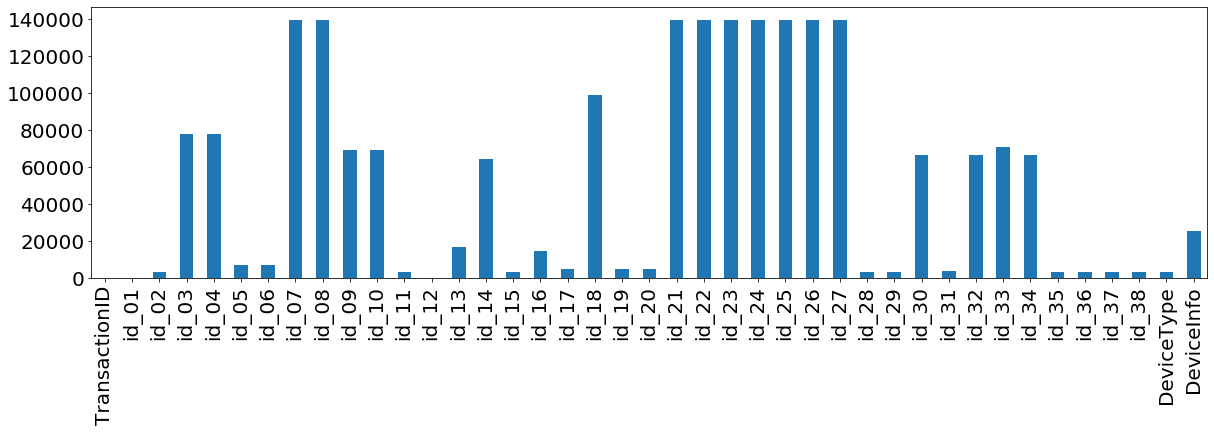

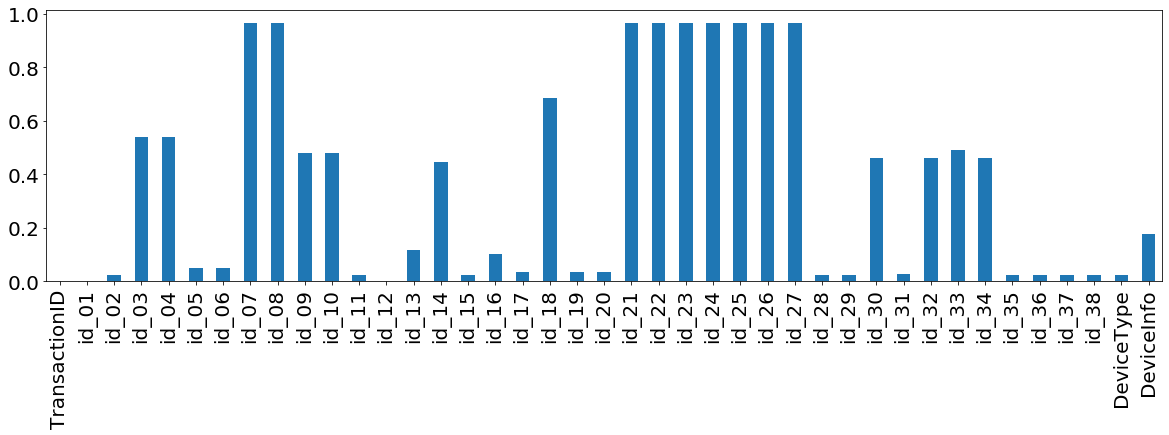

id_24            0.967088
id_25            0.964419
id_07            0.964259
id_08            0.964259
id_21            0.964231
id_26            0.964204
id_22            0.964162
id_27            0.964162
id_23            0.964162
id_18            0.687221
id_04            0.540161
id_03            0.540161
id_33            0.491871
id_10            0.480521
id_09            0.480521
id_30            0.462224
id_32            0.462079
id_34            0.460560
id_14            0.445037
DeviceInfo       0.177262
id_13            0.117262
id_16            0.103257
id_06            0.051084
id_05            0.051084
id_20            0.034472
id_19            0.034077
id_17            0.033723
id_31            0.027393
DeviceType       0.023732
id_02            0.023303
id_11            0.022568
id_28            0.022568
id_29            0.022568
id_15            0.022519
id_35            0.022519
id_36            0.022519
id_37            0.022519
id_38            0.022519
id_12       

In [9]:
checkMissingValues(data_id, 'NaN IDs')

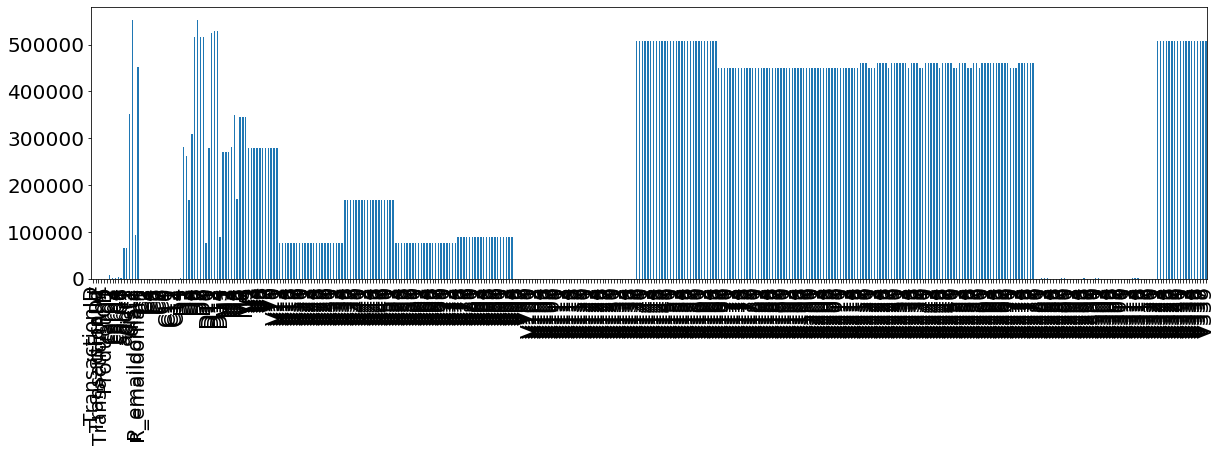

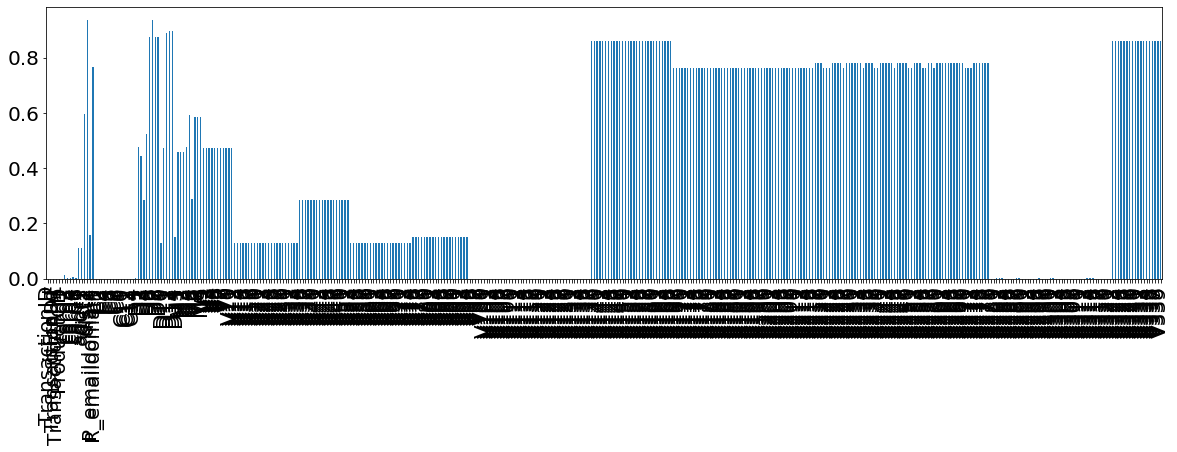

dist2            0.936284
D7               0.934099
D13              0.895093
D14              0.894695
D12              0.890410
                   ...   
C11              0.000000
C12              0.000000
C13              0.000000
C14              0.000000
TransactionID    0.000000
Length: 394, dtype: float64

In [10]:
checkMissingValues(data_tr, 'NaN Transactions')

### Dropping Feature with High Percentage of Missing Values

In [11]:
ids = dropFeatures(data_id, threshold=0.5)

Dropped 12/41 features with more than 0.5% of nan


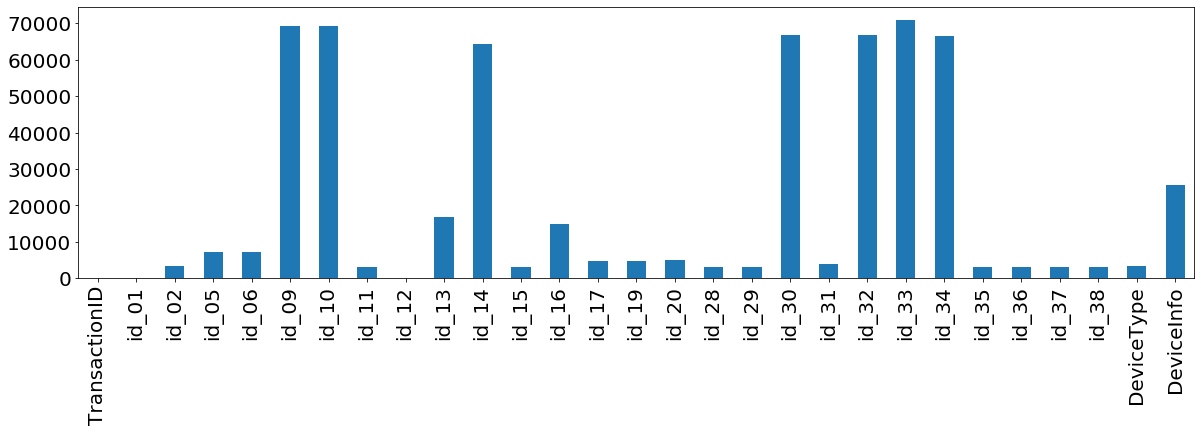

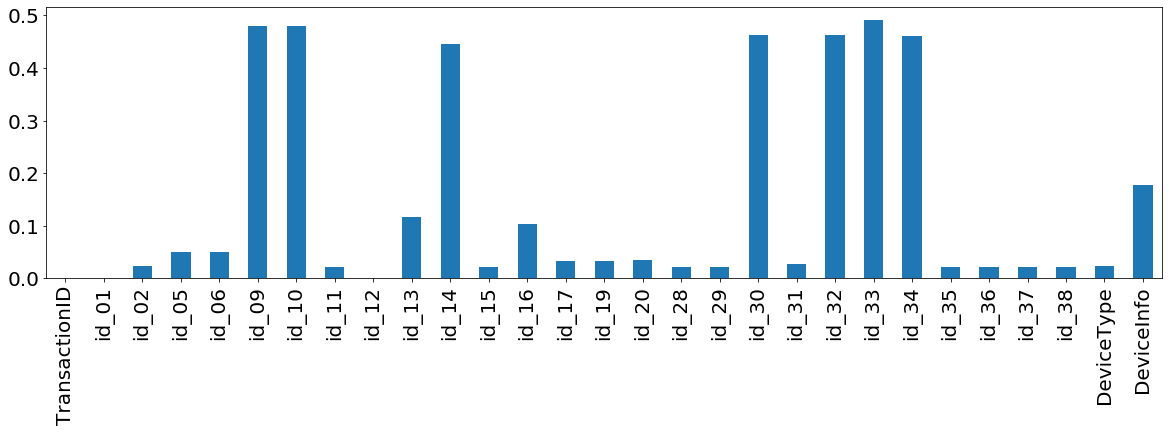

In [12]:
nan_ids = checkMissingValues(ids, 'NaN IDs')

In [13]:
trs = dropFeatures(data_tr, threshold=0.5)

Dropped 174/394 features with more than 0.5% of nan


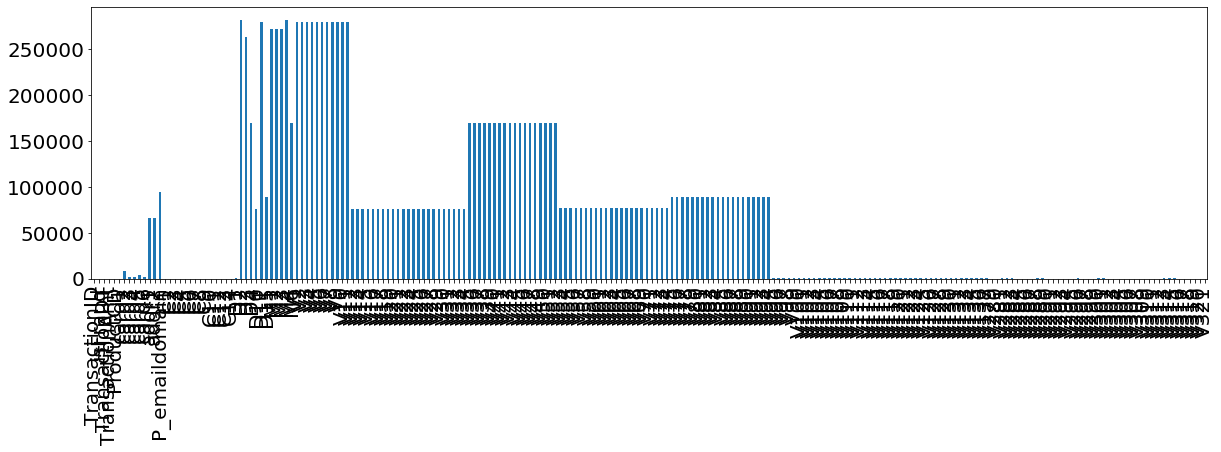

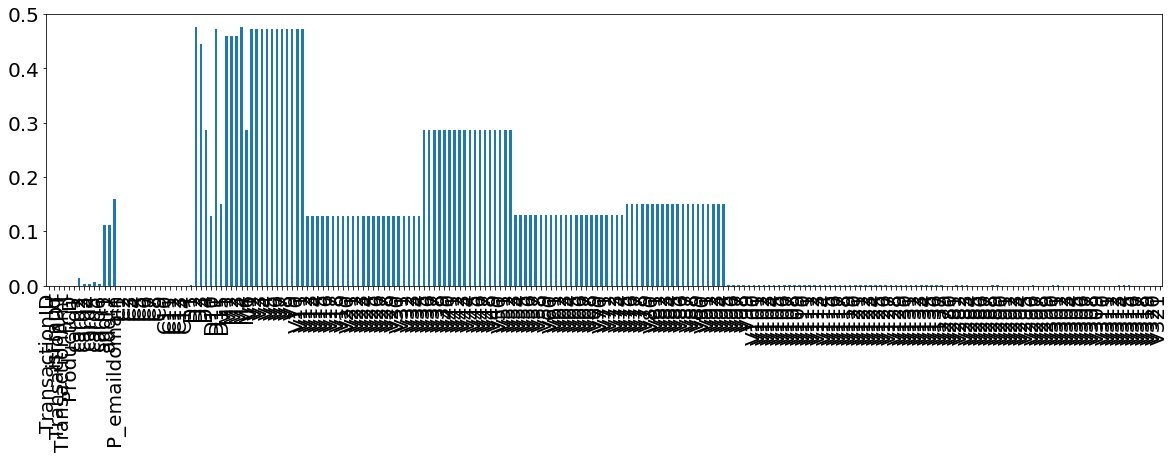

In [14]:
nan_trs = checkMissingValues(trs, 'NaN Transactions')

### Imputation of the rest

#### ID imputation

In [15]:
nan_ids[:10]

id_33         0.491871
id_09         0.480521
id_10         0.480521
id_30         0.462224
id_32         0.462079
id_34         0.460560
id_14         0.445037
DeviceInfo    0.177262
id_13         0.117262
id_16         0.103257
dtype: float64

In [16]:
threshold = 0.2
cols_nan = nan_ids[nan_ids > threshold].index
ids[cols_nan].head()

,id_33,id_09,id_10,id_30,id_32,id_34,id_14
0,2220x1080,NaN,NaN,Android 7.0,32.0,match_status:2,-480.0
1,1334x750,NaN,NaN,iOS 11.1.2,32.0,match_status:1,-300.0
2,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1280x800,0.0,0.0,Mac OS X 10_11_6,24.0,match_status:2,-300.0


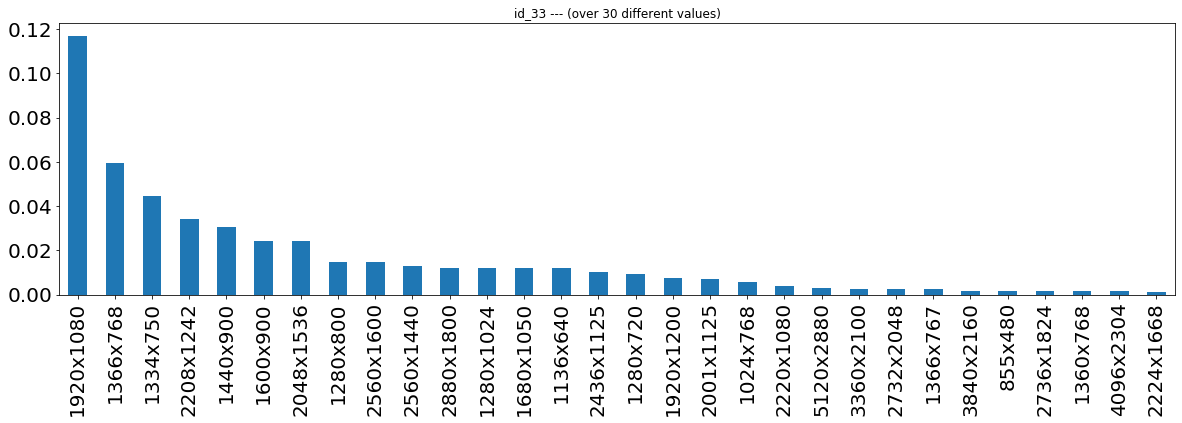

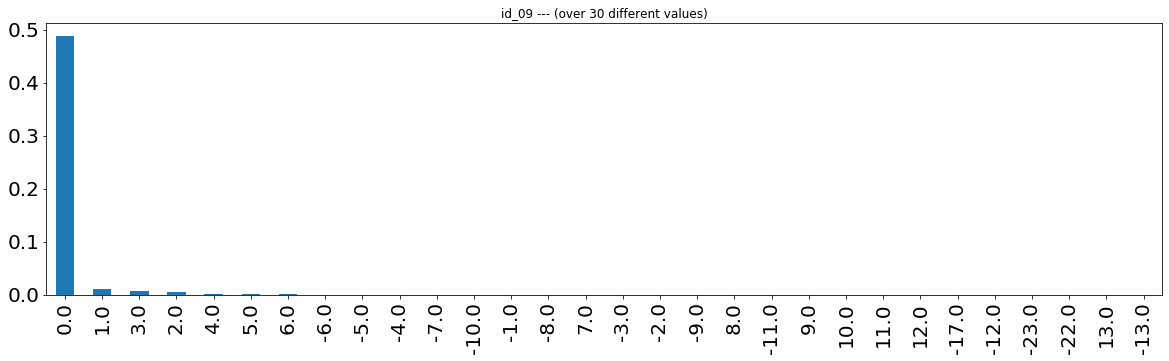

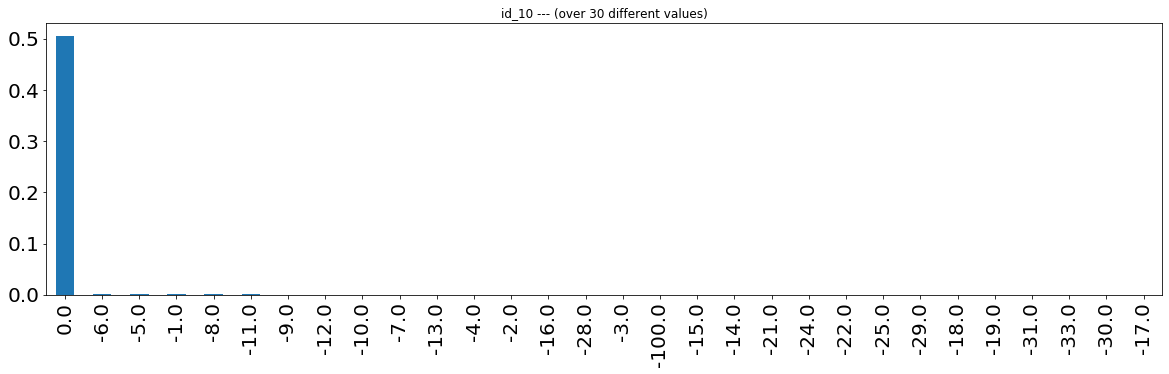

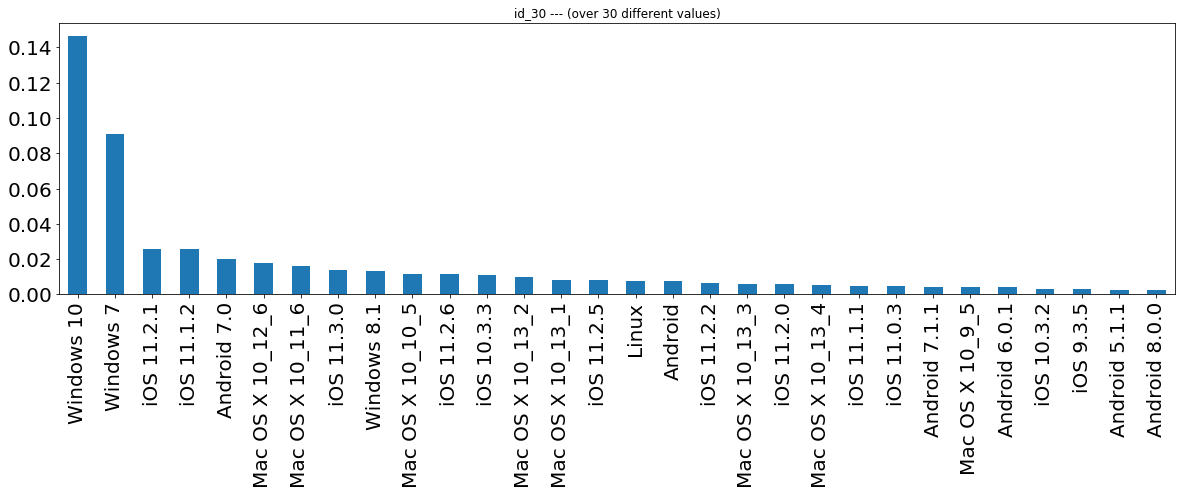

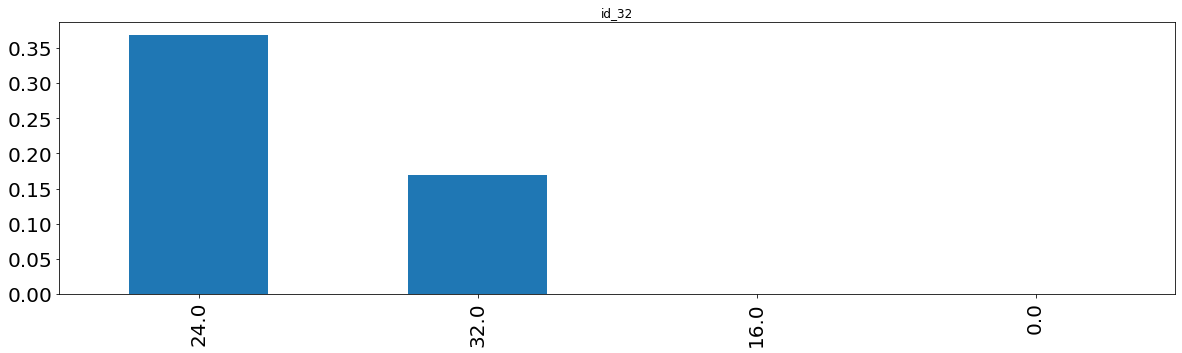

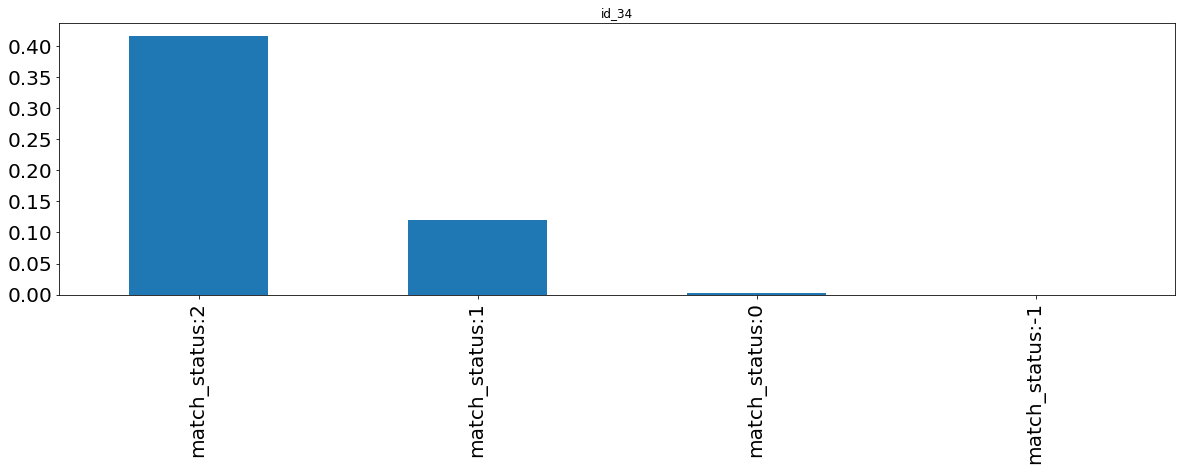

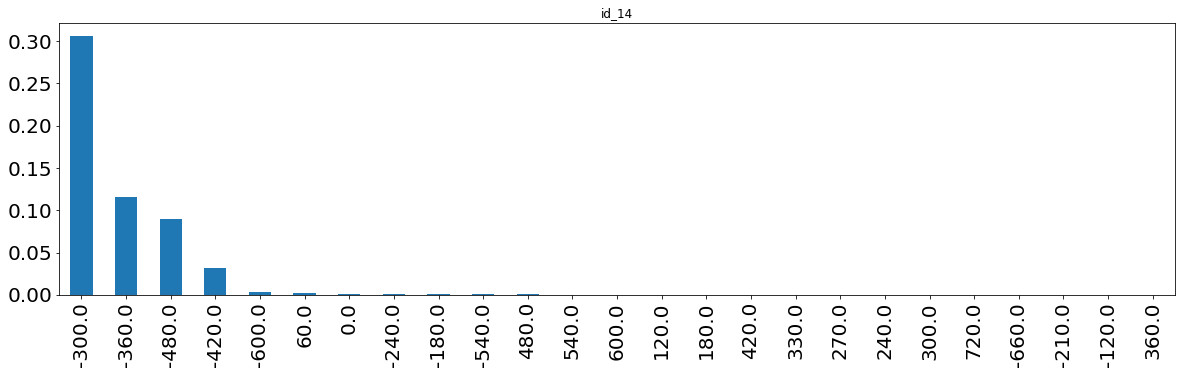

In [17]:
for col in cols_nan:
    
    feat, name = ids[col], str(col)

    checkValuesFeatures(feat, name)

- Imputation

##### Numerical Features

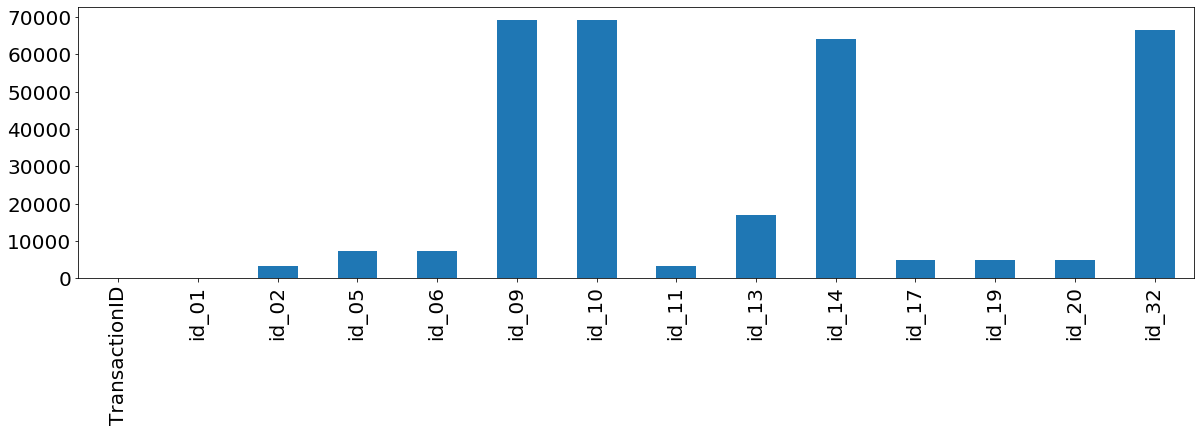

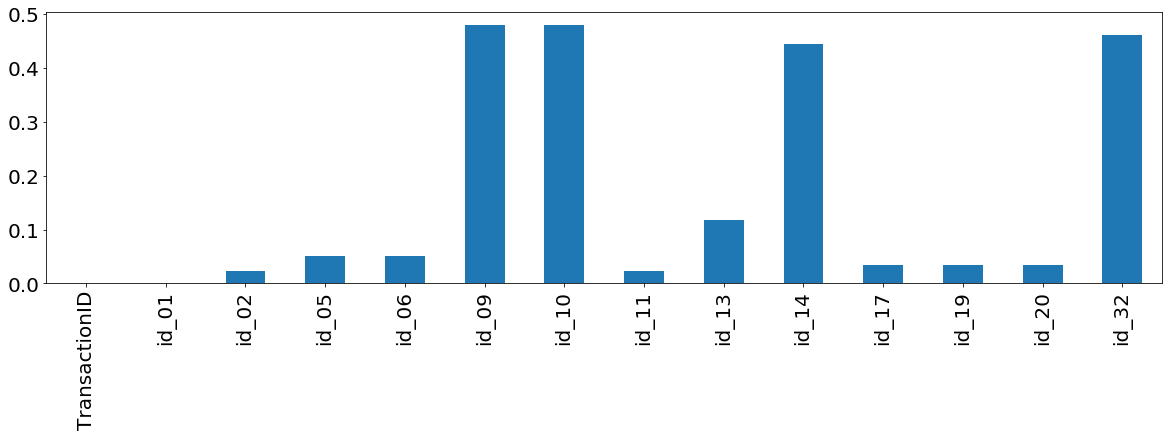

In [18]:
num_ids = ids.select_dtypes(include=['float', 'int'])
num_col_ids = num_ids.columns
num_col_ids

num_nan = checkMissingValues(num_ids, 'Numerical Ids')

In [19]:
nan_col = num_nan[num_nan > 0].index

for col in nan_col:
    mean = (ids[col]).mean()
    
    ids[col] = ids[col].fillna(int(mean))

In [20]:
ids.head()

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,1.0,-6.0,0.0,0.0,100.0,NotFound,48.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,0.0,-5.0,0.0,0.0,100.0,NotFound,49.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,...,chrome 62.0,26.0,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,0.0,-6.0,0.0,0.0,100.0,NotFound,52.0,...,chrome 62.0,26.0,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,48.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


##### Categorical Features

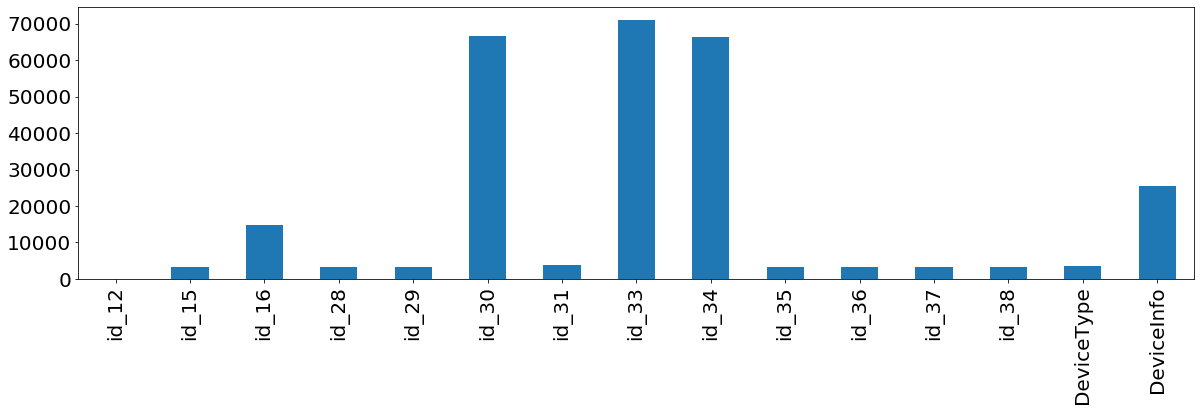

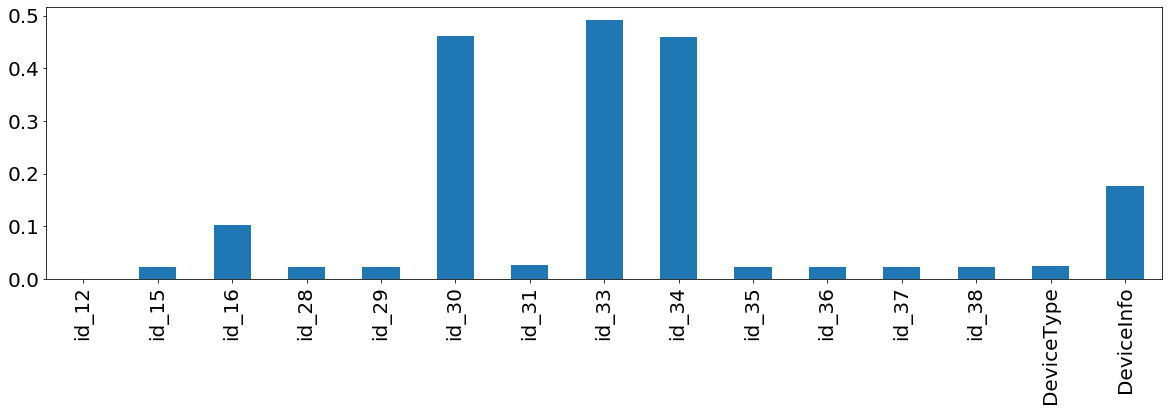

In [21]:
cat_ids = ids.select_dtypes(include=['object'])
cat_col_ids = cat_ids.columns
cat_col_ids

cat_nan = checkMissingValues(cat_ids, 'Categorical Ids')

In [22]:
nan_col = cat_nan[cat_nan > 0].index

for col in nan_col:
    
    count_feat = checkValuesFeatures(ids[col], plot=False)
    value = count_feat.index[0]
    #print(value)
    ids[col] = ids[col].fillna(value)

In [23]:
ids.head()

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,1.0,-6.0,0.0,0.0,100.0,NotFound,48.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,0.0,-5.0,0.0,0.0,100.0,NotFound,49.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,...,chrome 62.0,26.0,1920x1080,match_status:2,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,0.0,-6.0,0.0,0.0,100.0,NotFound,52.0,...,chrome 62.0,26.0,1920x1080,match_status:2,F,F,T,T,desktop,Windows
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,48.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


#### Transactions Imputation

In [24]:
nan_trs[0:10]

M4     0.476588
D2     0.475492
V1     0.472935
V7     0.472935
V4     0.472935
V3     0.472935
V2     0.472935
V8     0.472935
V11    0.472935
V9     0.472935
dtype: float64

In [25]:
threshold = 0.2
cols_nan = nan_trs[nan_trs > threshold].index
trs[cols_nan].tail(10)

,M4,D2,V1,V7,V4,V3,V2,V8,V11,V9,...,V36,V50,V52,V51,V39,V35,V42,V47,V48,D4
590530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
590531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590532,NaN,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,315.0
590533,NaN,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0
590534,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
590535,M0,29.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,M0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
590537,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
590538,M0,22.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0
590539,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0


##### Numerical Features

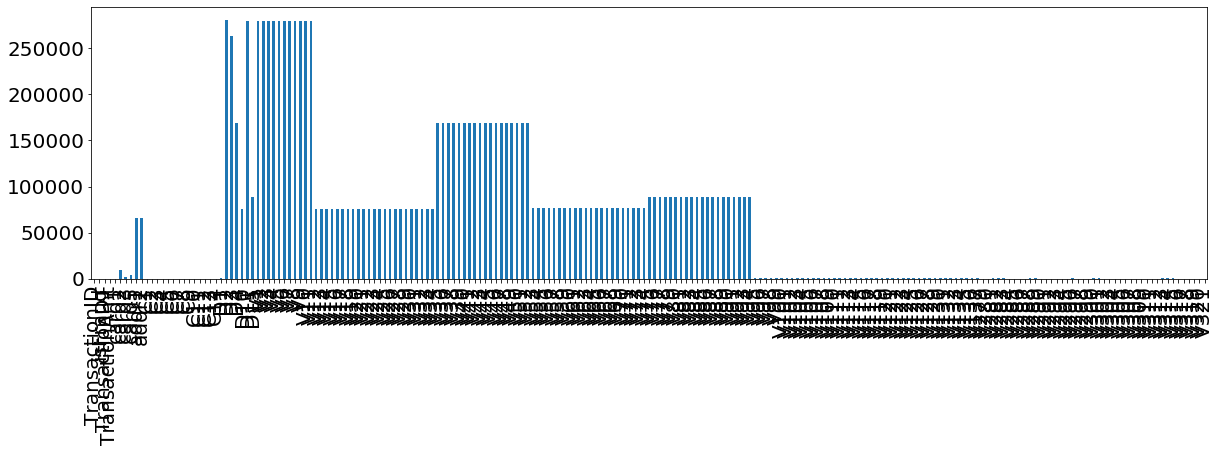

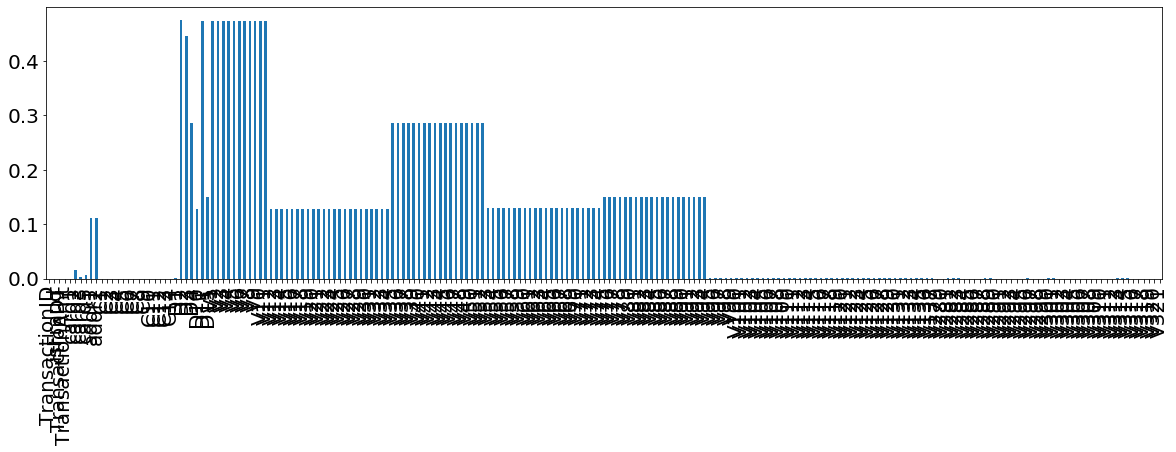

In [26]:
num_trs = trs.select_dtypes(include=['float', 'int'])
num_col_trs = num_trs.columns
num_col_trs

num_nan = checkMissingValues(num_trs, 'Numerical Transctions')

In [27]:
nan_col = num_nan[num_nan > 0].index

for col in nan_col:
    mean = (trs[col]).mean()
    
    trs[col] = trs[col].fillna(int(mean))

##### Categorical Features

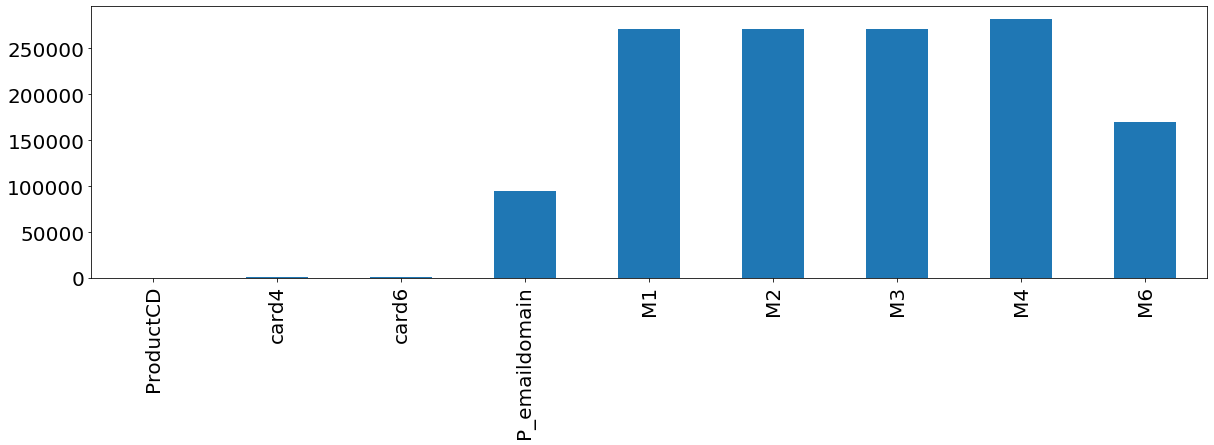

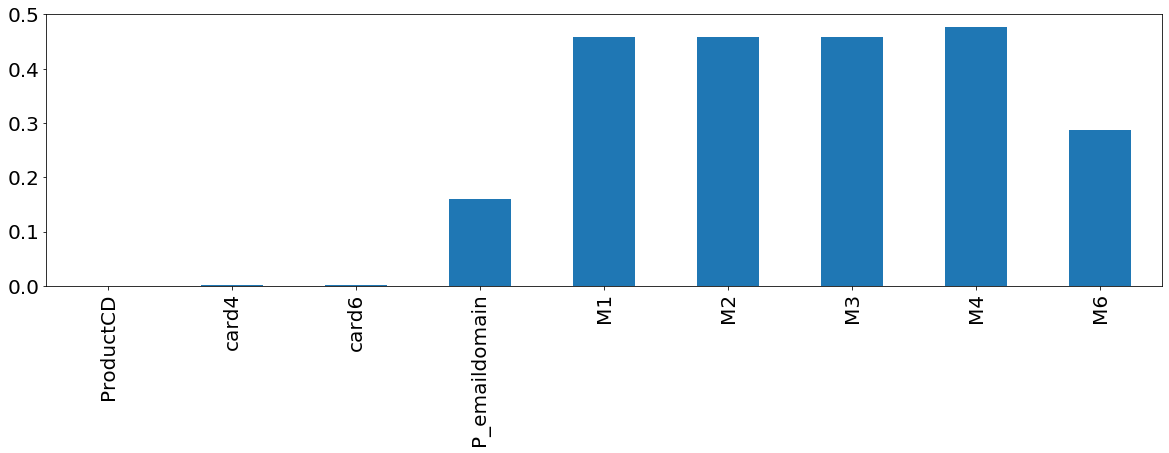

In [28]:
cat_trs = trs.select_dtypes(include=['object'])
cat_col_trs = cat_trs.columns
cat_col_trs

cat_nan = checkMissingValues(cat_trs, 'Categorical Transactions')

In [29]:
nan_col = cat_nan[cat_nan > 0].index

for col in nan_col:
    
    count_feat = checkValuesFeatures(trs[col], plot=False)
    value = count_feat.index[0]
    #print(value)
    trs[col] = trs[col].fillna(value)

In [30]:
trs.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,362.0,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
nan = checkMissingValues(ids, plot=False)
nan.sum()

0.0

In [32]:
nan = checkMissingValues(trs, plot=False)
nan.sum()

0.0

## Skewness

In [33]:
from scipy.stats import norm

In [34]:
def checkSkewness(data):
    
    skewness = data.skew().sort_values(ascending=False)
    
    return pd.DataFrame({'Skew':skewness})

### ID

In [35]:
checkSkewness(ids)

,Skew
id_14,3.632930
id_05,2.530252
id_02,1.860595
id_32,1.251353
TransactionID,0.394459
id_19,0.202030
id_17,0.142167
id_20,-0.323755
id_13,-1.334230
id_01,-3.669742


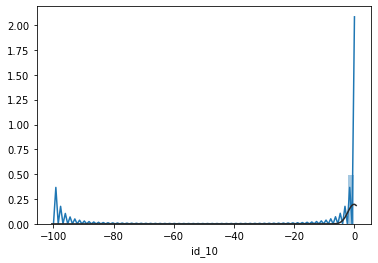

In [36]:
sn.distplot(ids['id_10'], fit=norm)

### Transactions

In [37]:
checkSkewness(trs)

,Skew
V305,384.230074
V311,323.834664
V129,240.338159
V309,224.877552
V319,181.835501
...,...
V88,-1.942644
V65,-2.189342
V14,-2.210234
addr2,-15.056133


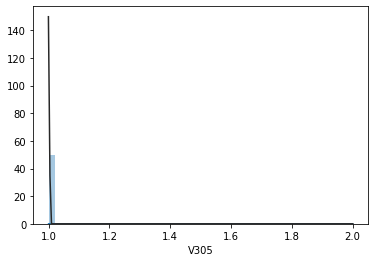

In [38]:
sn.distplot(trs['V305'], fit=norm)

# Anomaly Detection Model

In [151]:
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from torchsummary import summary

## Model Functions

In [134]:
class AE_Dataset(Dataset):
    '''
        Format the training dataset to be input into the auto encoder.
        Takes in dataframe and converts it to a PyTorch Tensor
    '''
    
    def __init__(self, data):
        self.x = data
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        '''
            Returns a example from the data set as a pytorch tensor.
        '''
        # Get example/target pair at idx as numpy arrays
        x = self.x[idx]

        # Convert to torch tensor
        x = torch.from_numpy(x).type(torch.FloatTensor)
        
        return x
    
def AE_Dataloader(data, batch_size=1):
    
    dataset = AE_Dataset(data)
    
    dataloader = DataLoader(dataset    = dataset,
                            batch_size = batch_size,
                            drop_last  = True,
                            shuffle = True,
                            num_workers= 8,
                            )
    
    return dataloader

In [157]:
class Encoder(nn.Module):
    
    def __init__(self, in_features):
        
        super(Encoder, self).__init__()
        
        # LAYER 1
        out_features = in_features // 2

        self.layer1 = nn.Linear(in_features=in_features,
                                out_features=out_features)
        self.relu1 = nn.ReLU()


        # LAYER 2
        in_features = out_features
        out_features = in_features // 2

        self.layer2 = nn.Linear(in_features=in_features,
                                out_features=out_features)
        self.relu2 = nn.ReLU()
        
        # LAYER 3
        in_features = out_features
        out_features = in_features // 2

        self.layer3 = nn.Linear(in_features=in_features,
                                out_features=out_features)
        self.relu3 = nn.ReLU()
        
    def forward(self, x):
        
        h = self.layer1(x)
        h = self.relu1(h)
        h = self.layer2(h)
        h = self.relu2(h)
        h = self.layer3(h)
        out = self.relu3(h)
        
        return out
    
class Decoder(nn.Module):
    
    def __init__(self, in_features):
        
        super(Decoder, self).__init__()
        
        # LAYER 1
        out_features = in_features * 2

        self.layer1 = nn.Linear(in_features=in_features,
                                out_features=out_features)
        self.relu1 = nn.ReLU()


        # LAYER 2
        in_features = out_features
        out_features = in_features * 2

        self.layer2 = nn.Linear(in_features=in_features,
                                out_features=out_features)
        self.relu2 = nn.Sigmoid()
        
        # LAYER 3
        in_features = out_features
        out_features = in_features * 2

        self.layer3 = nn.Linear(in_features=in_features,
                                out_features=211)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        
        h = self.layer1(x)
        h = self.relu1(h)
        h = self.layer2(h)
        h = self.relu2(h)
        h = self.layer3(h)
        out = self.sigmoid(h)
        
        return out

## Data Preparation

In [230]:
x_train = trs[trs['isFraud']==0]
x_train = x_train[num_col_trs]
#x_train = x_train.drop(['isFraud'], axis=1)
x_train

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_train


array([[-1.72651049,  0.        , -1.57320674, ..., -0.05443336,
        -0.08700513, -0.07279797],
       [-1.72650463,  0.        , -1.57320653, ..., -0.05443336,
        -0.08700513, -0.07279797],
       [-1.72649878,  0.        , -1.57319182, ..., -0.05443336,
        -0.08700513, -0.07279797],
       ...,
       [ 1.73188473,  0.        ,  1.82751376, ..., -0.05443336,
        -0.08700513, -0.07279797],
       [ 1.73189059,  0.        ,  1.8275157 , ..., -0.05443336,
        -0.08700513, -0.07279797],
       [ 1.73189644,  0.        ,  1.827525  , ...,  0.77516708,
         0.49813786,  0.64977247]])

In [152]:
x_train.shape

(569877, 211)

In [193]:
x_train[:25].shape

(25, 211)

In [194]:
dataloader = AE_Dataloader(x_train[:32], batch_size=32)

## Autoencoder Model

In [221]:
# AUTOENCODER

class Autoencoder():

    # MODEL SETUP
    
    def __init__(self, params):
        
        self.data = params['data']
        self.loss = params['loss']
        
        self.enc = Encoder(params['in_feat'])
        self.optim_enc = params['optim'](self.enc.parameters(), params['lr'])
                
        self.dec = Decoder(params['z_size'])
        self.optim_dec = params['optim'](self.dec.parameters(), params['lr'])
    
    def forward(self, x):
        
        z = self.enc(x)
        out = self.dec(z)
        
        return out
    
    def loss_function(self, x, out):
        return self.loss(x, out)
    
    def optimize(self, loss):
        
        self.optim_enc.zero_grad()
        self.optim_dec.zero_grad()
        
        loss.backward()
        
        self.optim_enc.step()
        self.optim_dec.step()
    
    
    # TRAINING
    
    def trainOneEpoch(self):
        
        for x in self.data:
            
            # forward
            out = self.forward(x)
            
            # loss
            loss = self.loss_function(x, out)
            
            # backward
            self.optimize(loss)
            
        return loss
    
    
    def train(self, epochs):
        
        for epoch in range(0,epochs):
            
            loss = self.trainOneEpoch()
            print('> Epoch {}/{}:  loss = {:.4f}'.format(epoch, epochs, loss))
            
    # TESTING
    
    def predict(self, x):
        
        x = torch.from_numpy(x).type(torch.FloatTensor)
        
        with torch.no_grad():
            out = self.forward(x)
        
        score = self.loss_function(x, out)
        
        return score.item()

In [203]:
lr = 0.001
in_features = len(trs[num_col_trs].columns)

optim = torch.optim.Adam
loss = nn.MSELoss()

params = {'in_feat':in_features,
          'z_size':int(in_features//8),
          'data':dataloader,
          'optim':optim,
          'lr':lr,
          'loss':loss}

In [186]:
enc = Encoder(in_features)

summary(enc, (1,211))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 105]          22,260
              ReLU-2               [-1, 1, 105]               0
            Linear-3                [-1, 1, 52]           5,512
              ReLU-4                [-1, 1, 52]               0
            Linear-5                [-1, 1, 26]           1,378
              ReLU-6                [-1, 1, 26]               0
Total params: 29,150
Trainable params: 29,150
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.11
Estimated Total Size (MB): 0.11
----------------------------------------------------------------


In [187]:
dec = Decoder(params['z_size'])

summary(dec, (1,params['z_size']))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 52]           1,404
              ReLU-2                [-1, 1, 52]               0
            Linear-3               [-1, 1, 104]           5,512
           Sigmoid-4               [-1, 1, 104]               0
            Linear-5               [-1, 1, 211]          22,155
           Sigmoid-6               [-1, 1, 211]               0
Total params: 29,071
Trainable params: 29,071
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.11
Estimated Total Size (MB): 0.12
----------------------------------------------------------------


### Traning

In [210]:
ae_model = Autoencoder(params)

In [211]:
ae_model.train(10)

> Epoch 0/10:  loss = 0.8575
> Epoch 1/10:  loss = 0.8424
> Epoch 2/10:  loss = 0.8276
> Epoch 3/10:  loss = 0.8131
> Epoch 4/10:  loss = 0.7991
> Epoch 5/10:  loss = 0.7855
> Epoch 6/10:  loss = 0.7722
> Epoch 7/10:  loss = 0.7594
> Epoch 8/10:  loss = 0.7470
> Epoch 9/10:  loss = 0.7350


### Testing

In [213]:
# normal samples

i = 0

sample = x_train[0]

for i in range(len(x_train[0:10])):
    sample = x_train[i]
    
    res = ae_model.predict(sample)
    print(res)


tensor(0.4667)
tensor(0.5167)
tensor(0.4035)
tensor(0.6047)
tensor(0.8686)
tensor(0.4108)
tensor(0.4252)
tensor(0.4585)
tensor(0.8449)
tensor(0.4646)


In [232]:
# anomalous samples

y_train = trs[trs.isFraud==1]
y_train = y_train[num_col_trs]
y_train = scaler.transform(y_train)

i = 0

sample = y_train[0]

for i in range(len(y_train[10:20])):
    sample = y_train[i]
    
    res = ae_model.predict(sample)
    print(res)

tensor(0.4535)
tensor(1.2646)
tensor(1.9088)
tensor(4.0275)
tensor(1.3038)
tensor(0.8355)
tensor(1.3100)
tensor(1.9154)
tensor(2.1777)
tensor(0.4160)


In [231]:
x = trs[num_col_trs]
x = scaler.transform(x)

for i in range(len(x[10:20])):
    sample = x[i]
    
    res = ae_model.predict(sample)
    print(res)

tensor(0.4667)
tensor(0.5167)
tensor(0.4035)
tensor(0.6047)
tensor(0.8686)
tensor(0.4108)
tensor(0.4252)
tensor(0.4585)
tensor(0.8449)
tensor(0.4646)



# Submission

In [224]:
test_tr[num_col_trs]

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
